In [41]:
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [42]:
from google.colab import files
uploaded=files.upload()
import io
import pandas as pd

io.StringIO(uploaded["Actual data for problem 1 (2).txt"].decode("utf-8"))
data=pd.read_csv("Actual data for problem 1 (2).txt", sep='delimiter', header=None)

Saving Actual data for problem 1 (2).txt to Actual data for problem 1 (2) (1).txt


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


In [43]:
import pandas as pd
import gensim
import nltk
from nltk.corpus import stopwords

import numpy as np
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import twitter_samples
from nltk.tag import pos_tag
import re, string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

df_new=data
df_new.columns = ['INDEX']


In [70]:
def preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and   
   # characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [71]:
import nltk
nltk.download('stopwords')

lst_stopwords = nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
import json
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for processing
import re
import nltk
## for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
## for explainer

## for word embedding
import gensim
import gensim.downloader as gensim_api
## for deep learning
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K
## for bert language mod
nltk.download('wordnet')


df_new["INDEX"] = df_new["INDEX"].apply(lambda x: preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [51]:
#I have created the label on my own by just analysing the mails .
#made 9 different classes for the classification of the problem
#INC stand for Extension of date for the course .
#session to see previous session

label=['login','password','INC','login','INC',
      'password','other','login','other','INC',
      'other','login','other','login','other',
      'other','login','other','login','login',
      'INC','login','INC','Refund','language',
      'login','login','other','INC','other',
      'other','login','other','INC','other',
      'INC','login','other','login','other',
      'login','INC','other','INC','login',
       'other','language','login','login','login',
       'password','INC','login','login','login',
       'login','other','session','password','other',
       'certificate','other','login','login','login',
       'other','password','INC','login','login',
       'session','login','INC','login','INC',
       'session','other','session','other','other',
       'INC','session','other','language','other',
       'other','login','refund','login','login',
       'login','session','password','other','INC',
       'session','other','session','other','login',
       'INC','Refund','session','other','session',
       'other','other','other','INC','other']

df_new['LABEL']=label
df_new.LABEL.unique()

array(['login', 'password', 'INC', 'other', 'Refund', 'language',
       'session', 'certificate', 'refund'], dtype=object)

In [73]:
# split dataset
df_train, df_test = model_selection.train_test_split(df_new, test_size=0.3)
## get target
y_train = df_train["LABEL"].values
y_test = df_test["LABEL"].values

In [74]:
## Count (classic BoW)
vectorizer = feature_extraction.text.CountVectorizer(max_features=10000, ngram_range=(1,2))

## Tf-Idf (advanced variant of BoW)
vectorizer = feature_extraction.text.TfidfVectorizer(max_features=10000, ngram_range=(1,2))

In [75]:
corpus = df_train["INDEX"]
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

In [76]:
classifier = naive_bayes.MultinomialNB()

## pipeline
model = pipeline.Pipeline([("vectorizer", vectorizer),  
                           ("classifier", classifier)])
## train classifier
model["classifier"].fit(X_train, y_train)
## test
X_test = df_test["INDEX"].values
predicted = model.predict(X_test)
predicted_prob = model.predict_proba(X_test)

In [77]:
import json
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for processing
import re
import nltk
## for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
## for explaine
## for word embedding
import gensim
import gensim.downloader as gensim_api
## for deep learning
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K
## for bert language mode

Accuracy: 0.24
Detail:
              precision    recall  f1-score   support

         INC       0.00      0.00      0.00         5
 certificate       0.00      0.00      0.00         1
       login       0.26      0.89      0.40         9
       other       0.00      0.00      0.00        14
    password       0.00      0.00      0.00         3
     session       0.00      0.00      0.00         1

    accuracy                           0.24        33
   macro avg       0.04      0.15      0.07        33
weighted avg       0.07      0.24      0.11        33



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


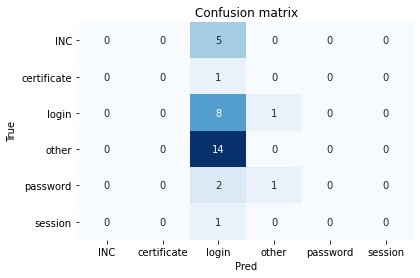

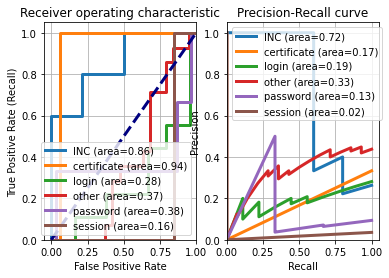

In [78]:
import sklearn.metrics as metrics

classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, predicted)
print("Accuracy:",  round(accuracy,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2)
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()

In [79]:
#we can see from the confusion matrix that most frequently asked problem is "LOGIN" problem

print("Most frequently asked problem is LOGIN")


#FOR the training purpose , best suited model is "LSTM"



import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

Most frequently asked problem is LOGIN


In [66]:
    
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df_new['INDEX'].values)
X = tokenizer.texts_to_sequences(df_new['INDEX'].values)
X = pad_sequences(X)

In [67]:
from keras.layers import Dense, Dropout, LSTM, Embedding
embed_dim = 50
lstm_out = 80
model = Sequential()
 
max_features = 2000

model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(Dropout(0.2))
model.add(LSTM(lstm_out))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 52, 50)            100000    
_________________________________________________________________
dropout_4 (Dropout)          (None, 52, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 80)                41920     
_________________________________________________________________
dropout_5 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 162       
Total params: 142,082
Trainable params: 142,082
Non-trainable params: 0
_________________________________________________________________
None


In [68]:
Y = pd.get_dummies(df_new['LABEL']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(73, 52) (73, 9)
(37, 52) (37, 9)


In [ ]:
Y = pd.get_dummies(df_new['LABEL']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

y_train = np.asarray(Y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))

model.fit(X_train, y_train, epochs=35, batch_size=32, verbose=1)

#save model to disk and print the summary
model.save('model.h5', overwrite=True)
print(model.summary())

In [ ]:
#For automating some of the frequntly occuring problem we can make a AUTOMATIC EMAIL SENDER
#Firstly with the help of our model , we going to classify the problem 
#Then we will send the mail to the end user, that we are dealing with the problem
#We will send the required solution very soon



In [ ]:
import smtplib, ssl
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

sender_email = "my@gmail.com"
receiver_email = "your@gmail.com"
password = input("Type your password and press enter:")

message = MIMEMultipart("alternative")
message["Subject"] = "multipart test"
message["From"] = sender_email
message["To"] = receiver_email

# Create the plain-text and HTML version of your message
text = """\
Hi,
We have understand your problem. Wait for sometime we are getting you with a solutiuon .

"""
html = """\
<html>
  <body>
    <p>Hi,<br>
    We have understand your problem very well . Wait for sometime we are getting you with a solutiuon .
<br>
  
    </p>
  </body>
</html>
"""

# Turn these into plain/html MIMEText objects
part1 = MIMEText(text, "plain")
part2 = MIMEText(html, "html")

# Add HTML/plain-text parts to MIMEMultipart message
# The email client will try to render the last part first
message.attach(part1)
message.attach(part2)

# Create secure connection with server and send email
context = ssl.create_default_context()
with smtplib.SMTP_SSL("smtp.gmail.com", 465, context=context) as server:
    server.login(sender_email, password)
    server.sendmail(
        sender_email, receiver_email, message.as_string()
    )